<a href="https://colab.research.google.com/github/innosevda/Spam_Text_Detection/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
# Necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# loading the dataset

messages = pd.read_csv('spam.csv',encoding = 'latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
messages.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
# Removing unnecessary columns

messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# renaming the column names
messages.columns=['label','message']

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


unique < total count --> meaning there are repeated messages

In [8]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

This gives us the following information:

4516 ham messages out of 4825 are unique..

653 span messages out of 747 are unique.

"Sorry, I'll call later" is the most popular ham message with repetition of 30 times.

"Please call our customer service representativ..." is the most popular spam message with repetition 4 times.


In [9]:
# more feature engineering
# creating new feature -> length of the text messages

messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
# Count the frequency of top 5 messages
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,"Wen ur lovable bcums angry wid u, dnt take it ...",4
4,Okie,4


## Data Visualization

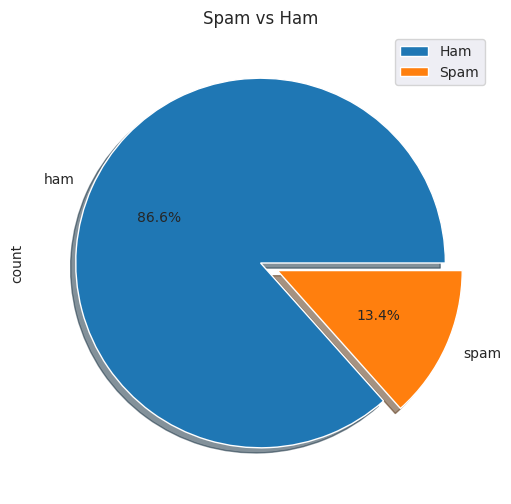

In [11]:
messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

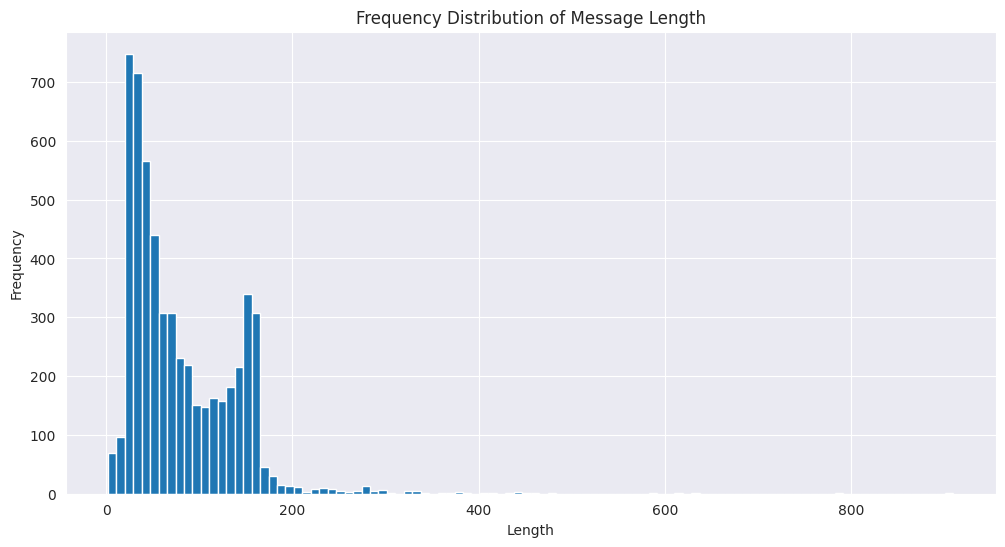

In [12]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals)
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [13]:
messages['length'].describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [14]:
# finding the text with maximum (910) characters
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

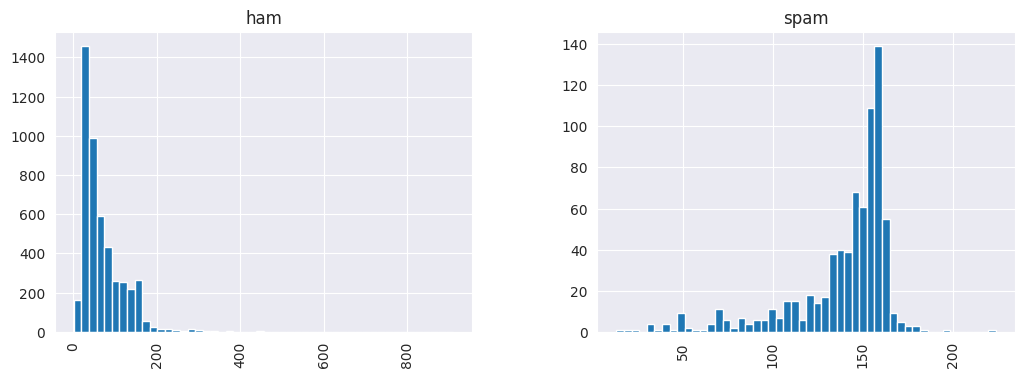

In [15]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Spam text seems to be longer -> this indicates that "lenght" actually can be useful feataure

# Text Pre-processing

In [16]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop

In [17]:
spam_messages = messages[messages["label"] == "spam"]["message"]
ham_messages = messages[messages["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


### Wordcloud for Spam Messages

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
spam_words = text_preprocess(spam_messages)

In [20]:
# lets print some spam words
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

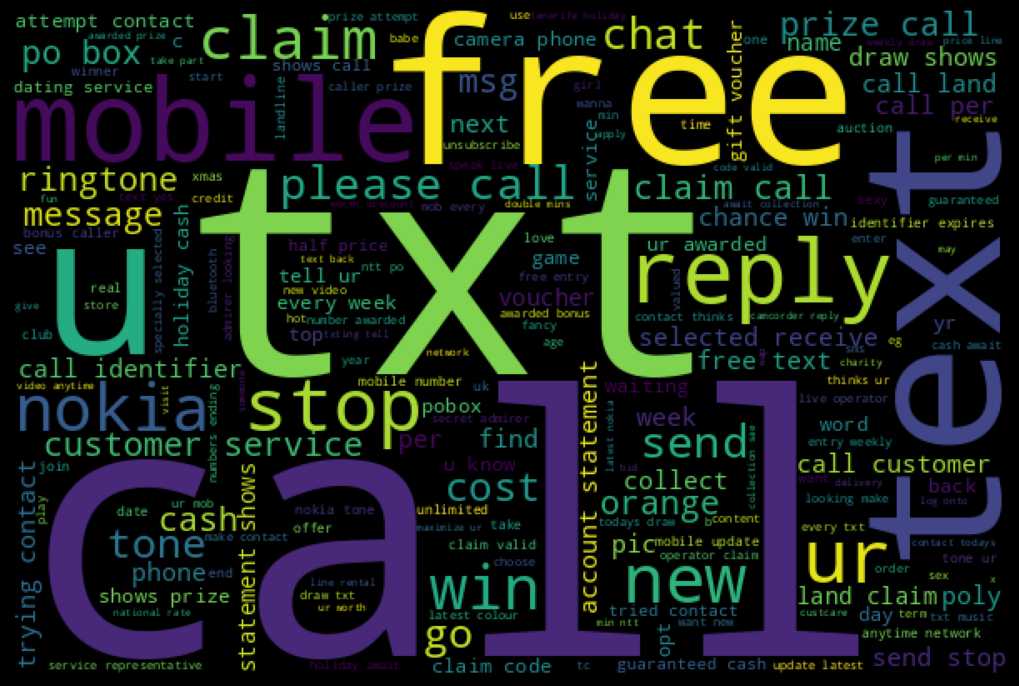

In [21]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
u          98
reply      98
stop       78
Name: count, dtype: int64


### WordCloud for Ham Messages

In [23]:
ham_words = text_preprocess(ham_messages)

In [24]:
# lets pring some ham words
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

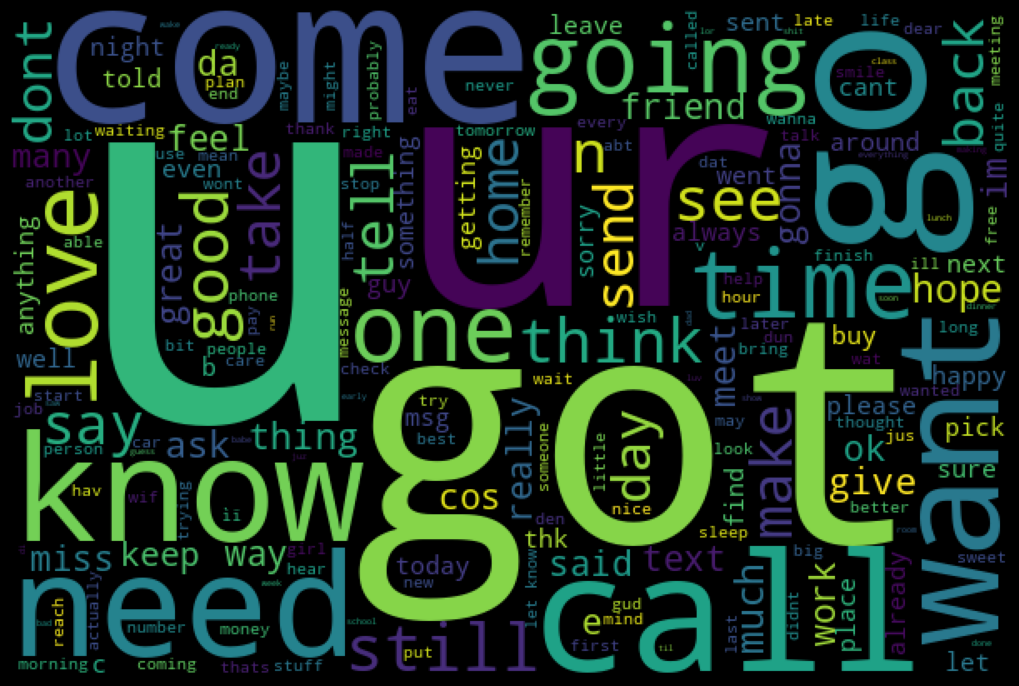

In [25]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [26]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        820
get      287
ur       235
go       231
got      216
like     215
know     202
come     201
call     200
going    151
Name: count, dtype: int64


# Data Transformation

In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Lets remove punctuations/ stopwords from all SMS
messages["message"] = messages["message"].apply(text_preprocess)

In [29]:
# Conver the SMS into string from list
messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))

<ipython-input-29-9edb9df9b933>:2: FutureWarning: using <function <lambda> at 0x7a8c214e7b00> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))


In [30]:
messages.head()

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [31]:
messages["message"][7]

'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune'

# Continuing Normalization

**Stemming** or distinguishing by **part of speech (POS)** won't be used due to high usage of abbreviations or shorthand. Example:

'IDK' -> 'I don't know'

## Vectorization

Converting tokens into vectors using **Bag of Words (BoW)**:


1. Count how many times does a word occur in each message (Known as term frequency or **TF**)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency or **IDF**)
3. Normalize the vectors to unit length, to abstract from the original text length (**L2 norm**)



## Creating the Bag of Words

In [32]:
# Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(messages['message'])

print("20 Bag of Words (BOW) Features: \n")
# Use get_feature_names_out() instead of get_feature_names()
print(vectorizer.get_feature_names_out()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['absence' 'absolutely' 'abstract' 'abt' 'abta' 'aburo' 'abuse' 'abusers'
 'ac' 'academic' 'acc' 'accent' 'accenture' 'accept' 'access' 'accessible'
 'accidant' 'accident' 'accidentally' 'accommodation']

Total number of vocab words :  8084


In [33]:
# Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:

message4 = messages['message'][3]
print(message4)

u dun say early hor u c already say


In [34]:
# its vector representation

# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 8084)>
  Coords	Values
  (0, 207)	1
  (0, 1981)	1
  (0, 2000)	1
  (0, 3141)	1
  (0, 5945)	2
(1, 8084)


This means that there are seven unique words in message number 4 (after removing common stop words).

In [35]:
print(bow_transformer.get_feature_names_out()[5945])

say


In [36]:
messages_bow = bow_transformer.transform(messages['message'])

In [37]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 8084)
Amount of Non-Zero occurences:  44211


In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [40]:
# classifying our single random message and checking how we do

tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 8084)>
  Coords	Values
  (0, 207)	0.3096257562744466
  (0, 1981)	0.3420160440299522
  (0, 2000)	0.37127907512470754
  (0, 3141)	0.5139528069861297
  (0, 5945)	0.6206136295983186


In [42]:
print(bow_transformer.get_feature_names_out()[5945])
print(bow_transformer.get_feature_names_out()[3141])

say
hor


In [43]:
# check what is the IDF (inverse document frequency) of the "say"?

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.14835197309133


In [44]:
# To transform the entire bag-of-words corpus into TF-IDF corpus at once:

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8084)


In [45]:
messages["message"][:10]

,message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts may...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
5,freemsg hey darling weeks word back id like fu...
6,even brother like speak treat like aids patent
7,per request melle melle oru minnaminunginte nu...
8,winner valued network customer selected receiv...
9,mobile months u r entitled update latest colou...


In [49]:
# converting clean text into a representation that a machine learning model can understand by using the Tfifd

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["message"])
print(features.shape)

print(len(vec.vocabulary_))

(5572, 7927)
7927


# Model Evaluation

In [50]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

In [51]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (4457, 8084)
train dataset label size (4457,)


test dataset features size (1115, 8084)
test dataset lable size (1115,)


## Building Naive Bayes classifier Model

In [52]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [53]:
predict_train = spam_detect_model.predict(msg_train)

In [54]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))

Classification Report 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3842
        spam       1.00      0.81      0.89       615

    accuracy                           0.97      4457
   macro avg       0.99      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



Confusion Matrix 
 [[3842    0]
 [ 118  497]]


Accuracy of Train dataset : 0.974


In [56]:
# testing on single data

print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages['label'][3])

predicted: ham
expected: ham


In [59]:
# testing on test data
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [60]:
print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       983
        spam       1.00      0.74      0.85       132

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115

[[983   0]
 [ 34  98]]


In [61]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))

Accuracy of the model : 0.970
